# BMW Price prediction

<img src="https://static.bangkokpost.com/media/content/20200305/c1_1872299.jpg" alt="BMW logo" width="800.33" height="200">

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv


# Introduction

Dreaming of having a BMW? Here is your tools to help you select for best value BMW in the market.



<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Data import and cleaning](#1)
1. [EDA](#3)
1. [Preparing to modeling](#4)
1. [Tuning models](#5)
    -  [Linear Regression](#5.1)
    -  [Support Vector Machines](#5.2)
    -  [Linear SVR](#5.3)
    -  [MLPRegressor](#5.4)
    -  [Stochastic Gradient Descent](#5.5)
    -  [Decision Tree Regressor](#5.6)
    -  [Random Forest with GridSearchCV](#5.7)
    -  [XGB](#5.8)
    -  [LGBM](#5.9)
    -  [GradientBoostingRegressor with HyperOpt](#5.10)
    -  [RidgeRegressor](#5.11)
    -  [BaggingRegressor](#5.12)
    -  [ExtraTreesRegressor](#5.13)
    -  [AdaBoost Regressor](#5.14)
    -  [VotingRegressor](#5.15)
1. [Models comparison](#6)
1. [Prediction](#7)

# 1.  Data import and cleaning

## Dataset explanation

Data is provided by 100,000 UK Used car dataset (https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes).For this notebook, we condiser only BMW car which has following features used for prediction of its price

1. model : model of the cars (i.e. 5 Series, X3, etc.)
2. year : year of 1st hand purchased
3. transmission : mode of transmission (manual or automatic or semi-auto)
4. mileage : total mileage of the car
5. tax : road tax incured
6. mpg : miles per gallon consumption
7. engineSize : in units of litres

In [4]:
df = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


Dataset was properly collected. There are no missing value presented. So in data preprocessing step, we can skip imputation process.

To gain further insight, I decide to add new columns to calculate vehicle age from its year since it might be a useful predictor for predict car price

In [6]:
#Age calculation (present year - year of purchased)
df['age'] = 2020 - df['year']
df = df.drop(columns = 'year')
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,5 Series,11200,Automatic,67068,Diesel,125,57.6,2.0,6
1,6 Series,27000,Automatic,14827,Petrol,145,42.8,2.0,2
2,5 Series,16000,Automatic,62794,Diesel,160,51.4,3.0,4
3,1 Series,12750,Automatic,26676,Diesel,145,72.4,1.5,3
4,7 Series,14500,Automatic,39554,Diesel,160,50.4,3.0,6


In [5]:
#Since there might be error in data gathered (There is petrol and diesel car that have engine size of 0)
df[df['engineSize'] == 0]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
621,i3,19998,Automatic,41949,Hybrid,140,470.8,0.0,3
778,i3,19998,Automatic,41146,Hybrid,0,470.8,0.0,3
780,i3,21898,Automatic,10839,Hybrid,0,470.8,0.0,3
1866,i3,19980,Automatic,26965,Hybrid,140,470.8,0.0,3
2352,i3,19490,Automatic,8421,Hybrid,0,470.8,0.0,4
3277,i3,16482,Automatic,43695,Hybrid,0,470.8,0.0,4
3628,i3,14285,Automatic,65800,Hybrid,0,470.8,0.0,5
3913,i3,18500,Automatic,36429,Hybrid,0,470.8,0.0,3
4100,i3,19495,Automatic,17338,Hybrid,135,470.8,0.0,3
4109,i3,17481,Automatic,9886,Hybrid,0,470.8,0.0,5


In [6]:
#Let's drop instances which fuelType are Diesel or Petrol but have 0.0 engineSize out.
df = df.drop(df[(df['engineSize'] == 0) & (df['fuelType'].isin(['Diesel','Petrol']))].index)
df[df['engineSize'] == 0]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
621,i3,19998,Automatic,41949,Hybrid,140,470.8,0.0,3
778,i3,19998,Automatic,41146,Hybrid,0,470.8,0.0,3
780,i3,21898,Automatic,10839,Hybrid,0,470.8,0.0,3
1866,i3,19980,Automatic,26965,Hybrid,140,470.8,0.0,3
2352,i3,19490,Automatic,8421,Hybrid,0,470.8,0.0,4
3277,i3,16482,Automatic,43695,Hybrid,0,470.8,0.0,4
3628,i3,14285,Automatic,65800,Hybrid,0,470.8,0.0,5
3913,i3,18500,Automatic,36429,Hybrid,0,470.8,0.0,3
4100,i3,19495,Automatic,17338,Hybrid,135,470.8,0.0,3
4109,i3,17481,Automatic,9886,Hybrid,0,470.8,0.0,5


# 2. Exploratory Data Analysis

There are 10781 instances of data. Total number of attributes are 9, of which 5 is quantitative, 3 is Qualitative.

Quantitative: mileage, tax, mpg, engineSize, age

Qualitative: model, transimission, fuelType

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   price         10781 non-null  int64  
 2   transmission  10781 non-null  object 
 3   mileage       10781 non-null  int64  
 4   fuelType      10781 non-null  object 
 5   tax           10781 non-null  int64  
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
 8   age           10781 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [14]:
df.shape

(10781, 9)

In [34]:
cat_col = df.select_dtypes(include = object).columns.tolist()
num_col = df.select_dtypes(exclude = object).columns.tolist()

In [35]:
num_col

['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']

In [36]:
cat_col

['model', 'transmission', 'fuelType']

## Univaraiate analysis

In [37]:
df.describe()

,price,mileage,tax,mpg,engineSize,age
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,22733.408867,25496.986550,131.702068,56.399035,2.167767,2.921065
std,11415.528189,25143.192559,61.510755,31.336958,0.552054,2.349038
min,1200.000000,1.000000,0.000000,5.500000,0.000000,0.000000
25%,14950.000000,5529.000000,135.000000,45.600000,2.000000,1.000000
50%,20462.000000,18347.000000,145.000000,53.300000,2.000000,3.000000
75%,27940.000000,38206.000000,145.000000,62.800000,2.000000,4.000000
max,123456.000000,214000.000000,580.000000,470.800000,6.600000,24.000000


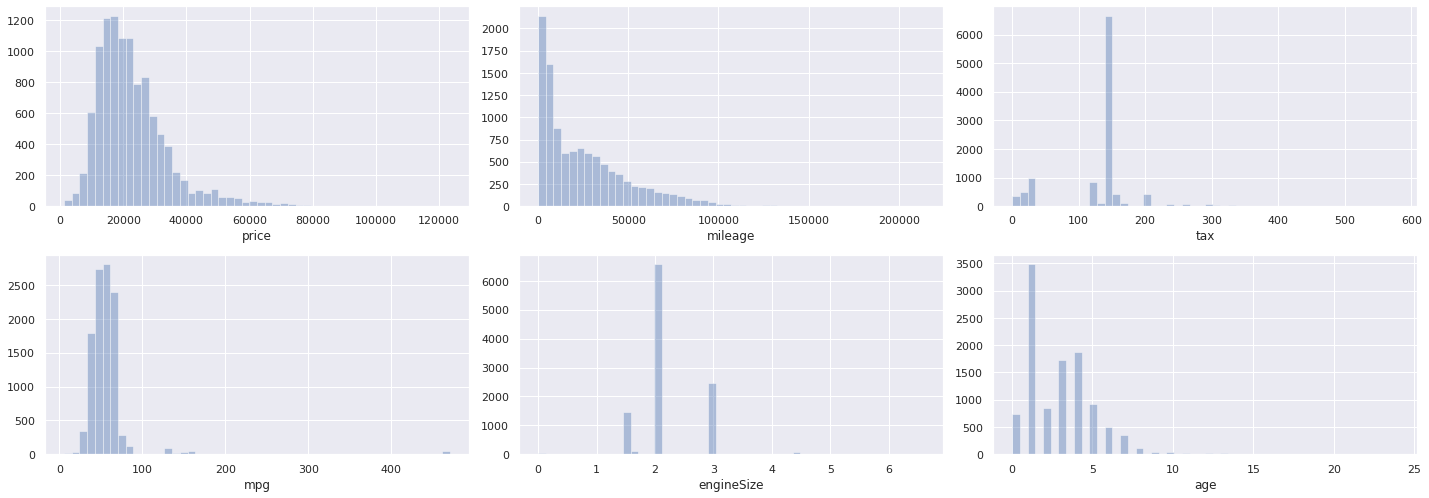

In [47]:
#numerical data
fig = plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
for index,col in enumerate(num_col):
    plt.subplot(3,3,index+1)
    sns.set(font_scale = 1.0)
    sns.distplot(df[col], kde = False)
fig.tight_layout(pad=1.0)

Data observation : 
1. Price distribution are right skew which has mean around 22800 and median around 20500
1. Mileage distribution are right skew with most of them are under 50,000 miles of usage
1. Tax distribution : most of our data are fixed value at 145
1. mpg are neary normal distribution with mean and median of 56.4 and 53
1. age are lying from new cars to oldest of 24 years old which has mean and median around 3 years old

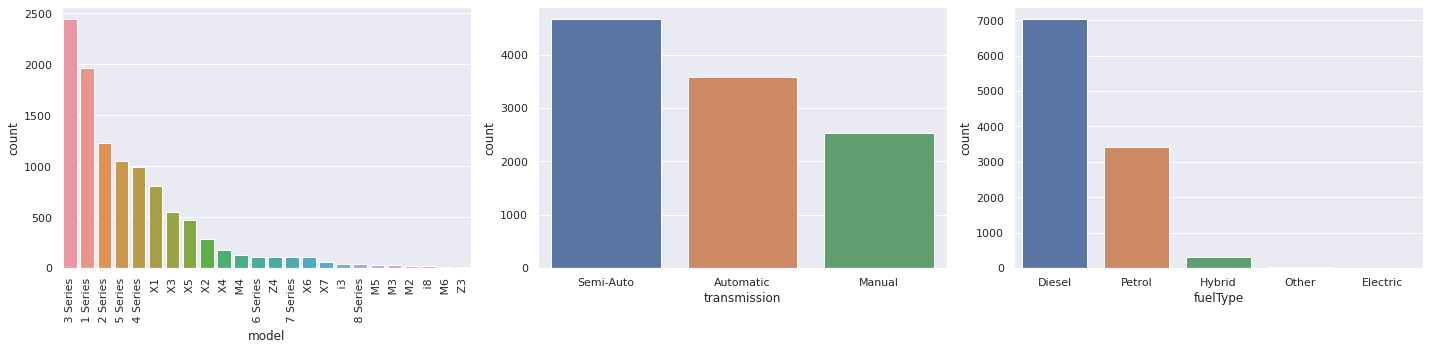

In [44]:
#Categorical feature
fig = plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
for index,col in enumerate(cat_col):
    plt.subplot(1,3,index+1)
    if(index == 0):
        plt.xticks(rotation=90)
    sns.set(font_scale = 1.0)
    sns.countplot(df[col], order = df[col].value_counts().index)

    
fig.tight_layout(pad=1.0)

Data observation
1. More than 50% of BMW on sold in our database are BMW 1 Series - 5 Series which are displayed above
2. Semi automatic transmission is the most popular following by automatic and manual transmission
3. 70% of them are Diesel powered following by petrol , hybrid and electric

## Bivariate Analysis

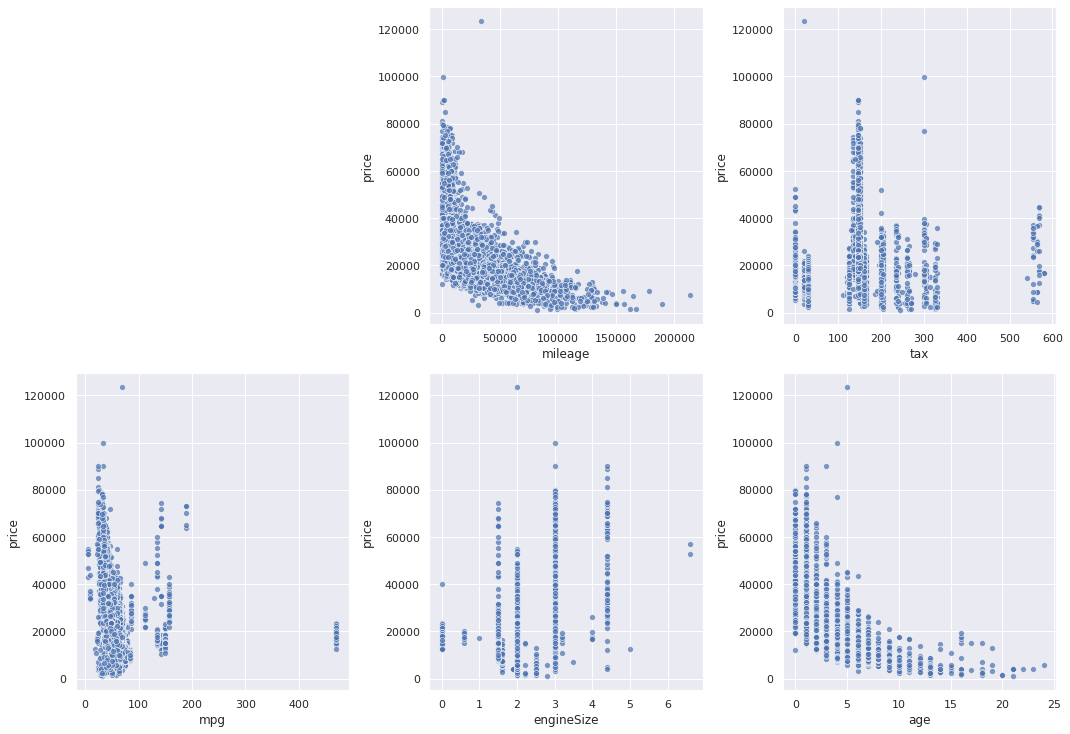

In [65]:
#numerical data
fig = plt.figure(figsize=(15,20))
sns.set_style('darkgrid')
for index,col in enumerate(num_col):
    if col == 'price':
        continue
    else:
        plt.subplot(4,3,index+1)
        sns.set(font_scale = 1.0)
        sns.scatterplot(data = df, x = col, y = 'price',alpha = 0.7)
fig.tight_layout(pad=1.0)

Data observation :
1. mileage and age show strong negative corelation against price (as common sense would work the same for this) 
1. tax and mpg show weak relationship with price
1. As engineSize grow up, car price tend to go up

<Figure size 720x720 with 0 Axes>

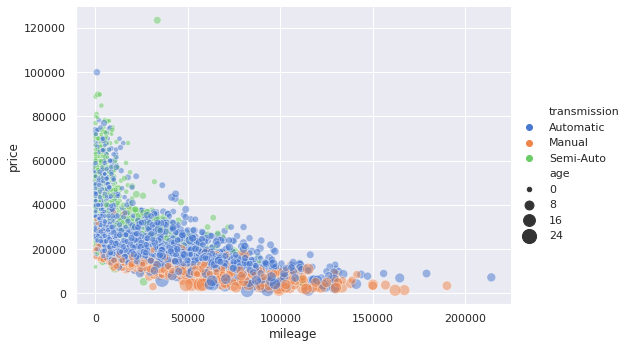

In [12]:
#
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.0)
sns.relplot(x="mileage", y="price", hue="transmission", size="age",
            sizes = (20,200), alpha=.5, palette="muted", aspect = 1.5 ,data=df)

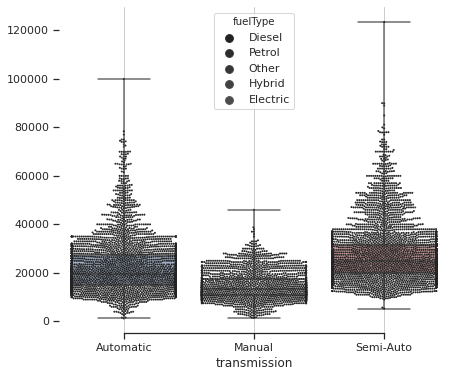

In [78]:


sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="transmission", y="price", data=df,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="transmission", y="price", data=df,
              size=2, color=".3", linewidth=0, hue = 'fuelType')

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

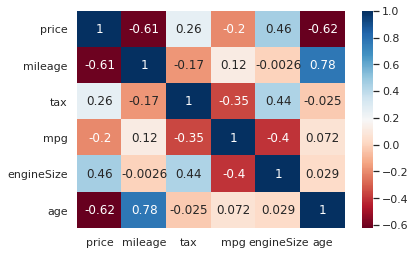

In [13]:
ax = sns.heatmap(df.corr(), annot=True, cmap='RdBu')

Finding 1

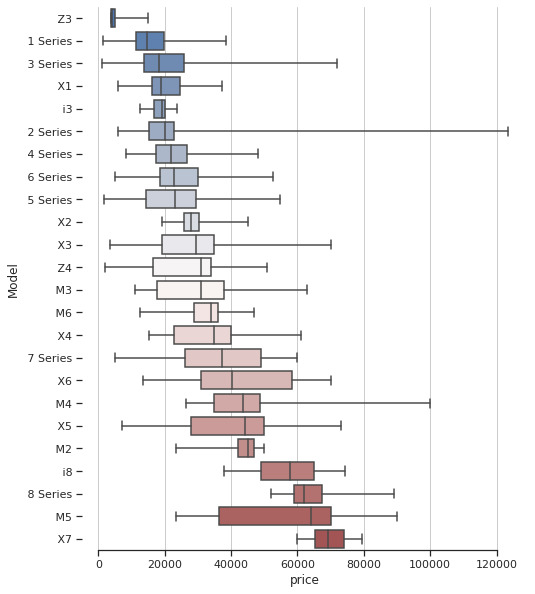

In [14]:
sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="price", y="model", data=df,
            whis=[0, 100], palette="vlag",
           order = df.groupby('model').median().sort_values(by = 'price').index)

# Add in points to show each observation
# sns.swarmplot(x="distance", y="method", data=planets,
#               size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Model")
sns.despine(trim=True, left=True)

Finding 2

# 3. Data preprocessing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

model_list = [(ElasticNet(),'ElasticNet'),
              (SGDRegressor(),'SGDRegressor'),
              (SVR(kernel='linear'),'SVR-linear'),
              (SVR(kernel='rbf'),'SVR-rbf'),
              (RandomForestRegressor(),'RandomForestRegressor'),
              (xgb.XGBRegressor(),'XGBoost')
             ]

In [16]:
X = df.copy().drop(columns='price')
y = df['price'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size = 0.2)

In [17]:
cat_col = ['model', 'transmission', 'fuelType']
num_col = ['mileage', 'tax', 'mpg', 'age','engineSize']

In [18]:
# num_pipeline = Pipeline([
#     ('std_scaler', StandardScaler())
# ])
# cat_pipeline = Pipeline([
#     ('onehot_enc', OneHotEncoder())
# ])
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_col),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
])

In [19]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [20]:
model_score = []

for m in model_list:
    model = m[0]
#     model.fit(X_train_prepared,y_train)
    score = cross_val_score(model,X_train_prepared,y_train,cv=4, scoring='r2')
    print(f'{m[1]} score = {score.mean()}')
    model_score.append([m[1],score.mean()])

ElasticNet score = 0.6343921255496863
SGDRegressor score = 0.858428766473594
SVR-linear score = 0.4465673893647466
SVR-rbf score = 0.013242391574499857
RandomForestRegressor score = 0.9408034447413247
XGBoost score = 0.9417260658916843


from cross validation score, we decide to continue develop on XGBoost model